In [1]:
######## PACKAGE INSTALATION  #######
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## <span style="color:#1f77b4"><b>STEP 2: Measuring media effectiveness </b></span>


### <span style="color:#1f77b4"><b>Programmatic Dataset: Data Cleaning and Descriptive Statistics </b></span> 

In [2]:
df_programmatic = pd.read_csv('data/programmatic_publisher.csv')
df_programmatic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493428 entries, 0 to 17493427
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   dsp_id           object 
 1   timestamp_utc    object 
 2   campaign_name    object 
 3   device_type      object 
 4   cost_milli_cent  float64
dtypes: float64(1), object(4)
memory usage: 667.3+ MB


In [3]:
df_programmatic.head(10)

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930
3,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-26 19:15:54,Contextual,TV,1191.750
4,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-05-31 18:38:54,Retargeting,TV,739.262
5,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-05 22:50:03,Retargeting,PC,153.500
6,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-09 21:06:22,Contextual,TV,5878.010
7,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-15 21:41:44,Contextual,TV,3073.631
8,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 20:47:06,Contextual,TV,3161.905
9,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 21:56:50,Contextual,TV,2582.035


In [5]:
for col in df_programmatic.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_programmatic[col].unique())


📌 Unique values in 'dsp_id':
['dsp9tnGII5BeXbn6LUSFZPcKGCyI0F' 'dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ'
 'dspcd3UcXUcUk0PEo2hb8CEH3WVlFE' ... 'dspbV1X6ia7x8IMxQQgHqasXsZvSev'
 'dsp4PJIYh8QWwR5FCxYcxPJzUOCuQo' 'dspeuhlwK7LBRgCX3sMsSMFIxLHkeD']

📌 Unique values in 'timestamp_utc':
['2024-02-06 04:10:41' '2024-02-26 23:49:23' '2024-06-16 20:55:27' ...
 '2024-04-21 10:54:56' '2024-03-07 21:07:25' '2024-06-19 00:04:31']

📌 Unique values in 'campaign_name':
['Contextual' 'Retargeting']

📌 Unique values in 'device_type':
['Phone' 'PC' 'TV' 'Unknown' 'Robot']

📌 Unique values in 'cost_milli_cent':
[ 283.496 1884.537  601.93  ... 2362.996 1902.544 1589.538]


In [5]:
# Client frequency table
client_frequency = df_programmatic['dsp_id'].value_counts().reset_index()
client_frequency.columns = ['dsp_id', 'frequency']
client_frequency = client_frequency.sort_values('frequency', ascending=False)

print("Client Frequency Table:")
print(client_frequency)

Client Frequency Table:
                                 dsp_id  frequency
0                               unknown    1907730
1        dsphWn1b3sH6wluDvi3ipsvHSqSs1A        194
2        dspGgGMy9D8tTvo7IoHwXOaUOYNlKE        193
3        dspfhqXaeTQf24O3RE7uaAakbcMaS3        171
4        dspK9A148mt6dpOvdrmDxPaOE7VWX6        163
...                                 ...        ...
5101019  dsplb2HbAIHFOGR38kkWThT94WZZUv          1
5101018  dspZv4vkCnTxCEyz97Z6J2IM8DNrw5          1
5101017  dspBPQKJ8PobkgZHnr4TVxleXOXlFd          1
5101016  dspdyEcFppymLGN7kxofjKxGfKtPD3          1
4636723  dsp8e8efsgceaof46OeYhtBfvrzMky          1

[5101025 rows x 2 columns]


In [7]:
# Remove rows where dsp_id is 'unknown'
df_programmatic = df_programmatic[df_programmatic['dsp_id'] != 'unknown']

print(f"Dataset shape after removing unknown dsp_id: {df_programmatic.shape}")
print(f"\nRemaining dsp_id values:\n{df_programmatic['dsp_id'].value_counts()}")

Dataset shape after removing Unknown dsp_id: (15585698, 5)

Remaining dsp_id values:
dsp_id
dsphWn1b3sH6wluDvi3ipsvHSqSs1A    194
dspGgGMy9D8tTvo7IoHwXOaUOYNlKE    193
dspfhqXaeTQf24O3RE7uaAakbcMaS3    171
dspK9A148mt6dpOvdrmDxPaOE7VWX6    163
dspWib019dAsV3OvvuALZmtgeJ9Kuf    158
                                 ... 
dsp2f0zq6idjW5Qca8So9Y6kr9nzO9      1
dspEWhZMMdW456q3nq8qOHSHVjhLw1      1
dspWDn1oHMmW9SrXHv9f4FHtNQLEkT      1
dspdgprxZgW3qc9GXMugYHQRGNqfqM      1
dspcd3UcXUcUk0PEo2hb8CEH3WVlFE      1
Name: count, Length: 5101024, dtype: int64


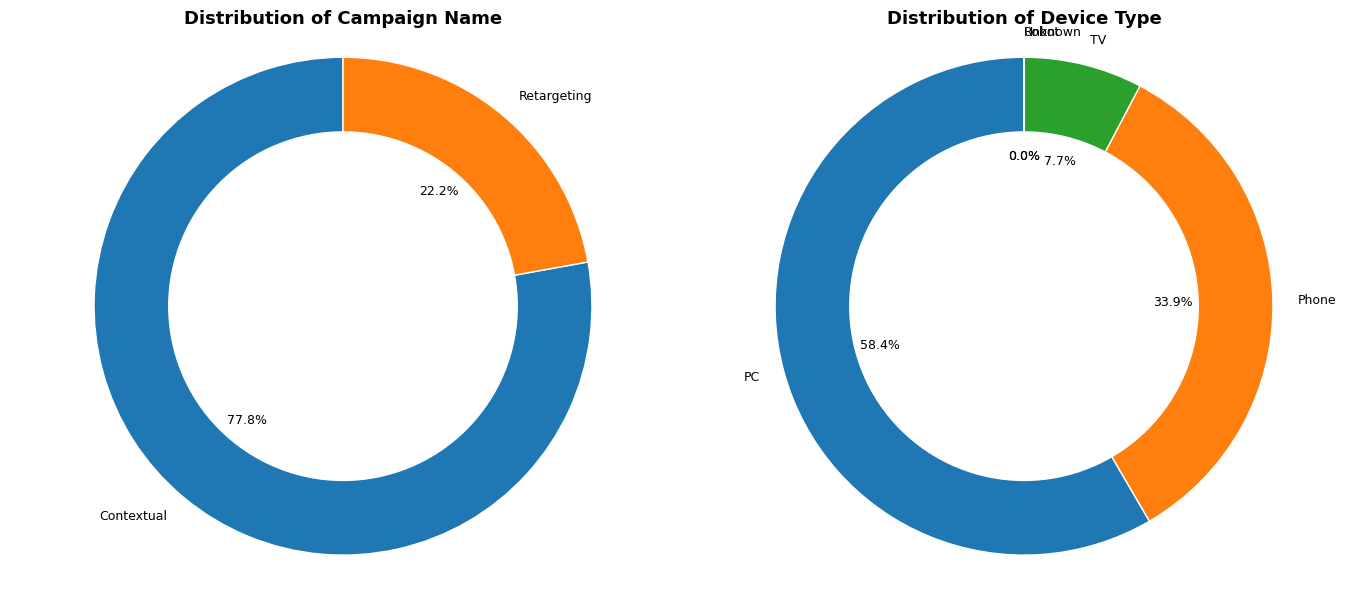

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ---------- Donut chart: Campaign Name ----------
campaign_counts = df_programmatic['campaign_name'].fillna('Missing').value_counts()

ax1.pie(
    campaign_counts,
    labels=campaign_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'}
)
ax1.add_artist(plt.Circle((0, 0), 0.70, color='white'))
ax1.set_title("Distribution of Campaign Name", fontsize=13, weight='bold')
ax1.axis('equal')

# ---------- Donut chart: Device Type ----------
device_counts = df_programmatic['device_type'].fillna('Missing').value_counts()

ax2.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'}
)
ax2.add_artist(plt.Circle((0, 0), 0.70, color='white'))
ax2.set_title("Distribution of Device Type", fontsize=13, weight='bold')
ax2.axis('equal')

plt.tight_layout()
plt.show()


Unknow et Robot are rare in our Data base:

*** We can drop lines concerned

*** Or use it in the goal to catch some information about it

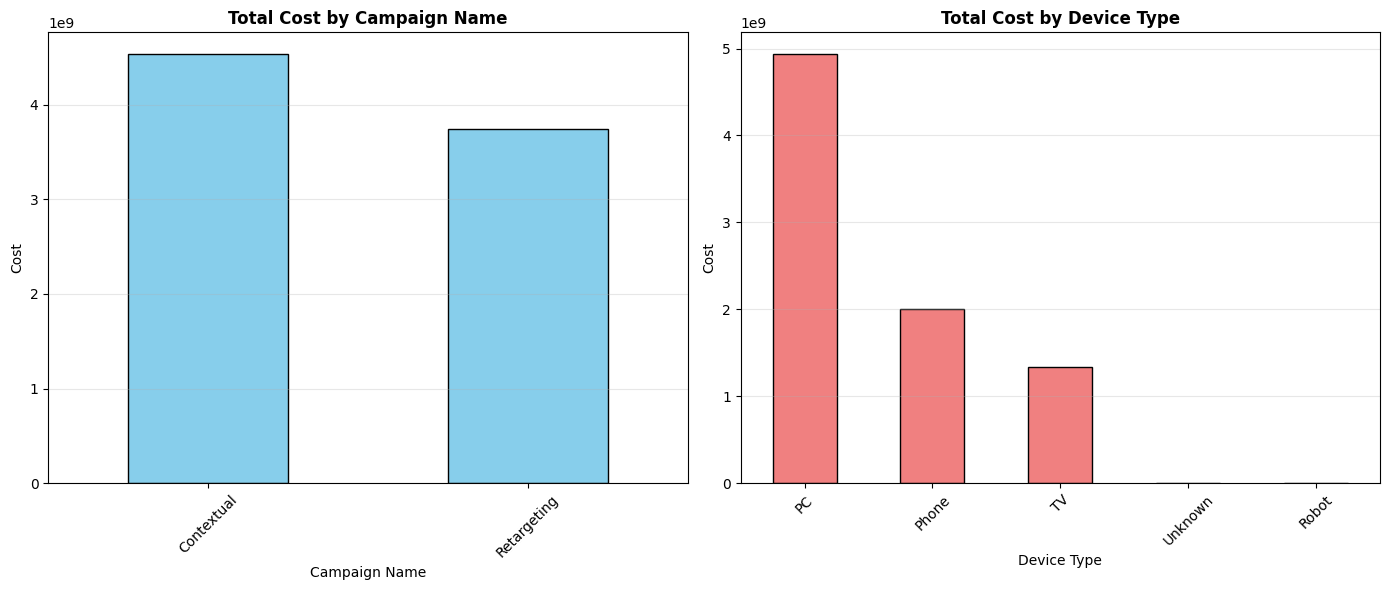

In [9]:
# Total Cost by Campaign and Device Type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Cost distribution by campaign_name
cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Total Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Cost distribution by device_type
cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Total Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

The devices Unknown and robot don't cost so we can drop it 

In [10]:
# Remove rows where device_type is 'Robot' or 'Unknown'
df_programmatic = df_programmatic[~df_programmatic['device_type'].isin(['Robot', 'Unknown'])]

print(f"Dataset shape after removing Robot and Unknown: {df_programmatic.shape}")
print(f"\nRemaining device types:\n{df_programmatic['device_type'].value_counts()}")

Dataset shape after removing Robot and Unknown: (15585064, 5)

Remaining device types:
device_type
PC       9102841
Phone    5280813
TV       1201410
Name: count, dtype: int64


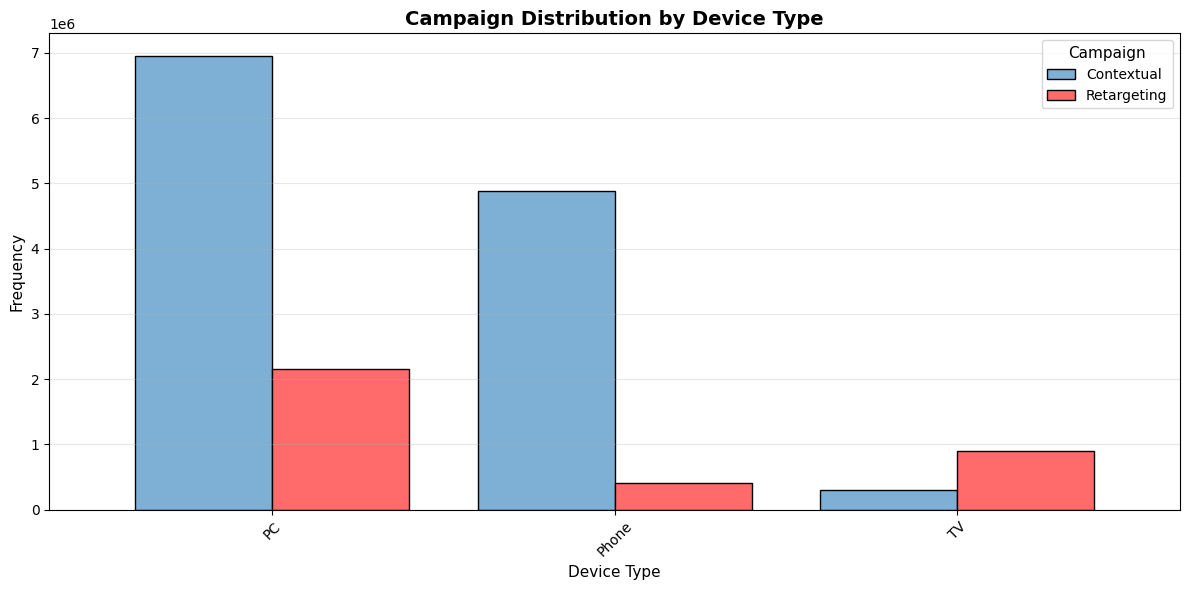

In [11]:
# Side-by-side barplots: Campaign distribution by Device Type
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for grouped barplot
campaign_by_device = (
    df_programmatic
    .groupby(['device_type', 'campaign_name'])
    .size()
    .unstack(fill_value=0)
)

campaign_by_device.plot(kind='bar', ax=ax, color=['#7EB0D5', '#FF6B6B'], edgecolor='black', width=0.8)

ax.set_title('Campaign Distribution by Device Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Device Type', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

AVERAGE COST BY CAMPAIGN NAME
campaign_name
Retargeting    1084.997068
Contextual      373.857295
Name: cost_milli_cent, dtype: float64

AVERAGE COST BY DEVICE TYPE
device_type
TV       1112.680053
PC        542.645341
Phone     379.838457
Name: cost_milli_cent, dtype: float64


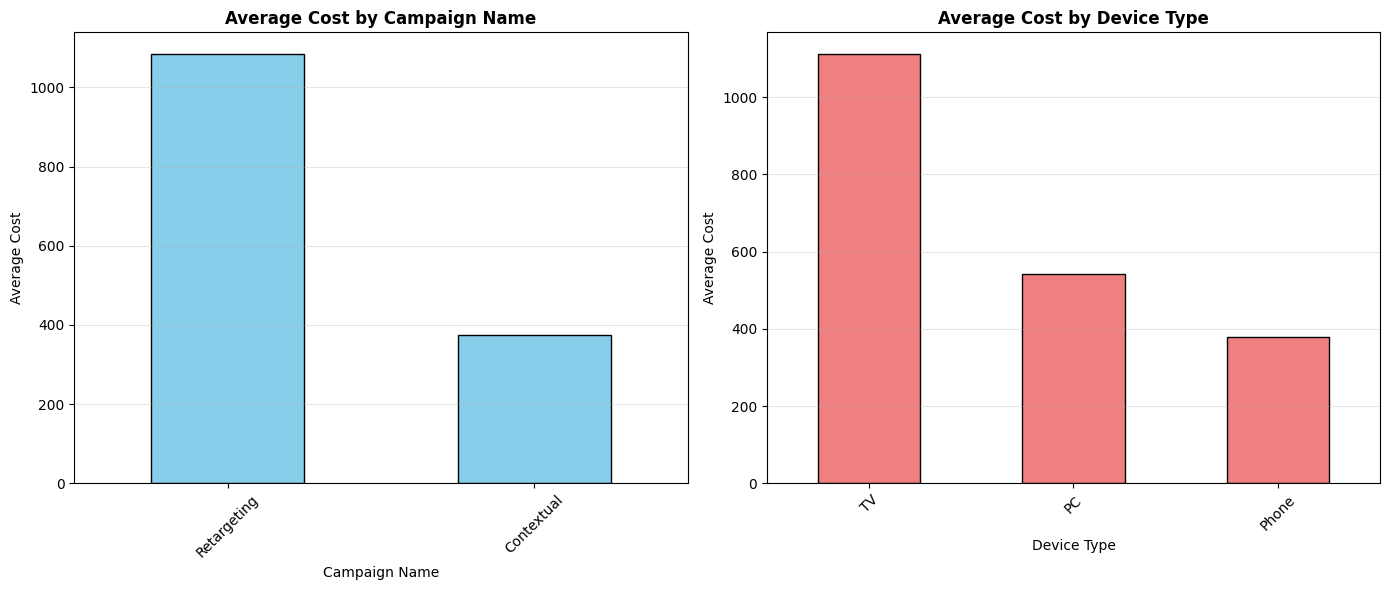

In [12]:
# Average cost by campaign_name and device_type
print("=" * 60)
print("AVERAGE COST BY CAMPAIGN NAME")
print("=" * 60)
avg_cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_campaign)

print("\n" + "=" * 60)
print("AVERAGE COST BY DEVICE TYPE")
print("=" * 60)
avg_cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_device)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

avg_cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Average Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Average Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

avg_cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Average Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Average Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

TOTAL COST BY MONTH AND CAMPAIGN
campaign_name    Contextual   Retargeting
month                                    
2024-01        9.342554e+08  7.119703e+08
2024-02        8.382235e+08  8.510169e+08
2024-03        6.762439e+08  3.686618e+08
2024-04        6.408455e+08  5.719100e+08
2024-05        7.726810e+08  6.575349e+08
2024-06        6.733590e+08  5.855530e+08


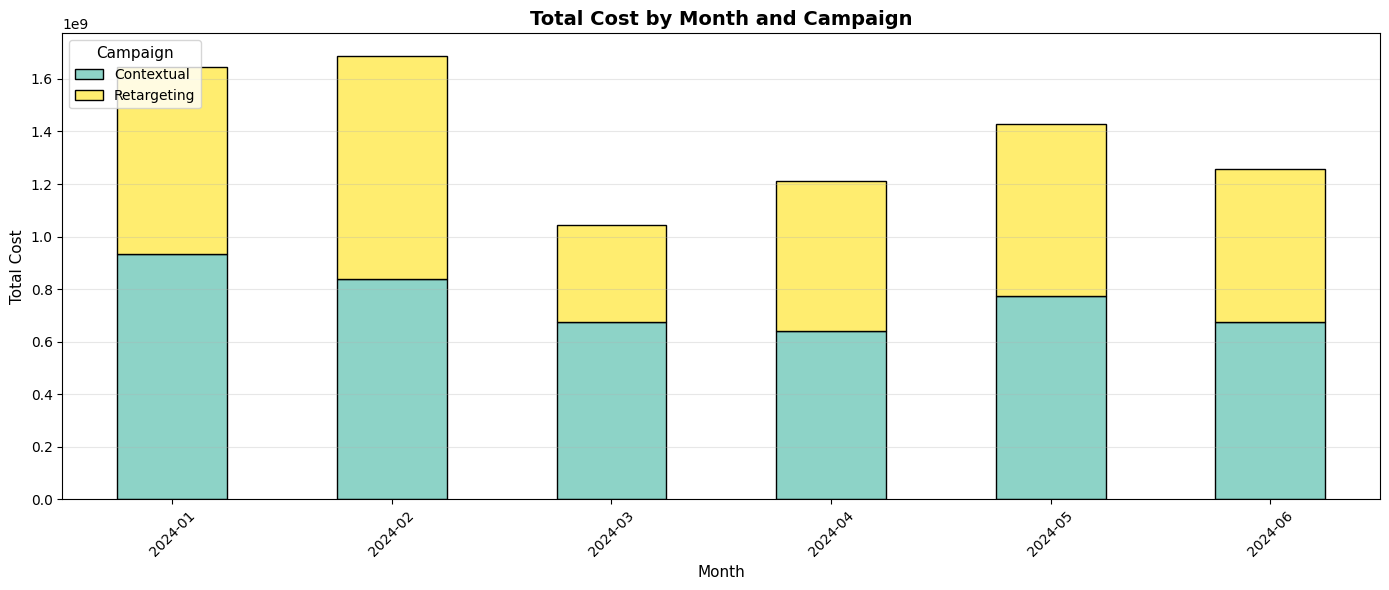

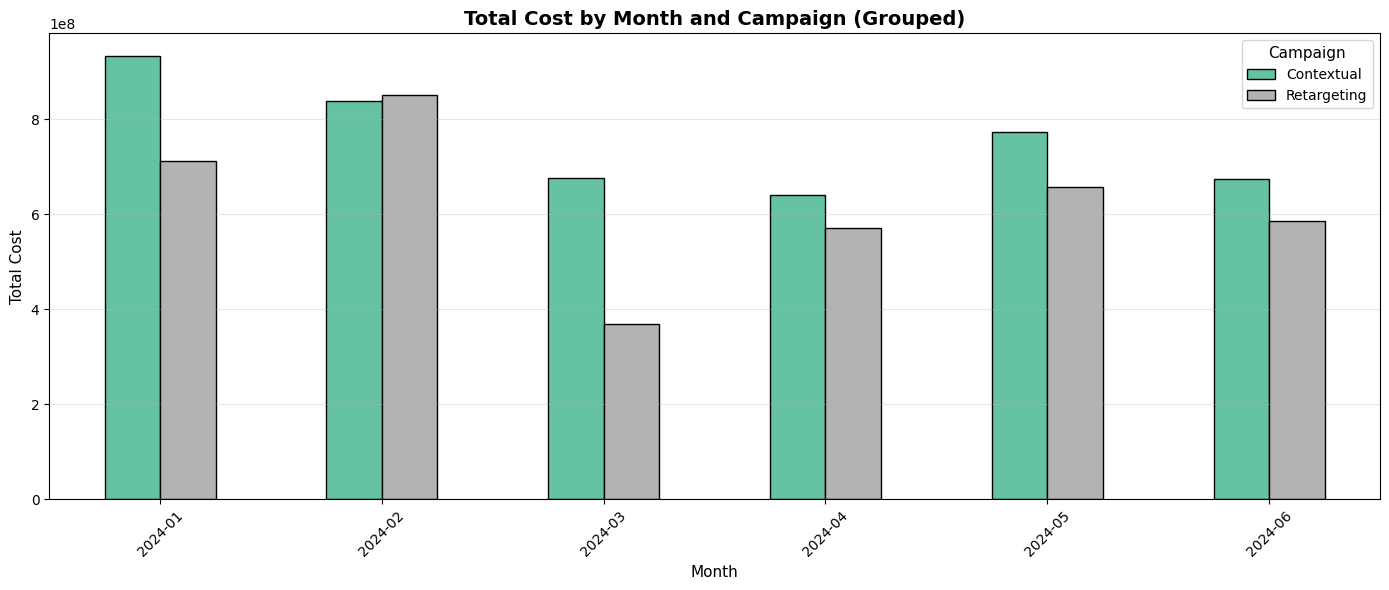

In [13]:
# Total cost by month and campaign
print("=" * 80)
print("TOTAL COST BY MONTH AND CAMPAIGN")
print("=" * 80)
df_programmatic['date'] = pd.to_datetime(df_programmatic['timestamp_utc'])
df_programmatic['month'] = df_programmatic['date'].dt.to_period('M')

monthly_campaign_cost = df_programmatic.groupby(['month', 'campaign_name'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_campaign_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_campaign_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_campaign_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TOTAL COST BY MONTH AND DEVICE TYPE
device_type            PC         Phone            TV
month                                                
2024-01      1.121154e+09  3.585555e+08  1.665167e+08
2024-02      1.120521e+09  3.812514e+08  1.874676e+08
2024-03      5.671502e+08  3.620115e+08  1.157439e+08
2024-04      7.323349e+08  3.403802e+08  1.400403e+08
2024-05      8.273953e+08  3.309570e+08  2.718635e+08
2024-06      5.710589e+08  2.327003e+08  4.551529e+08


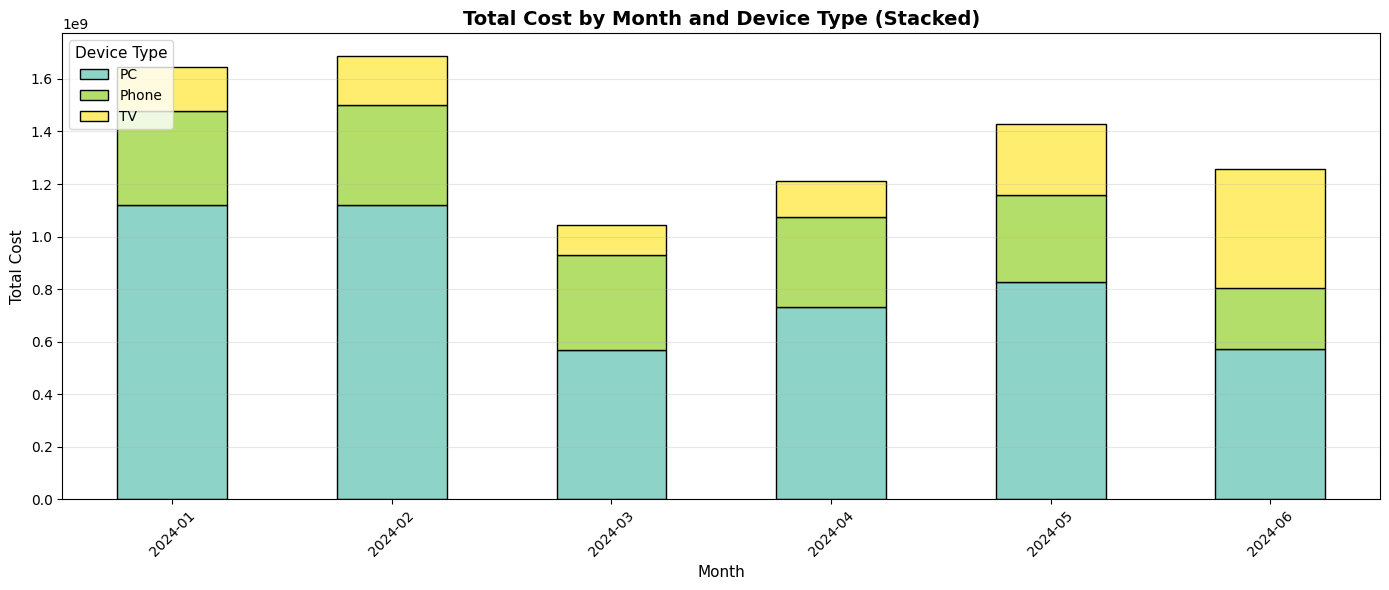

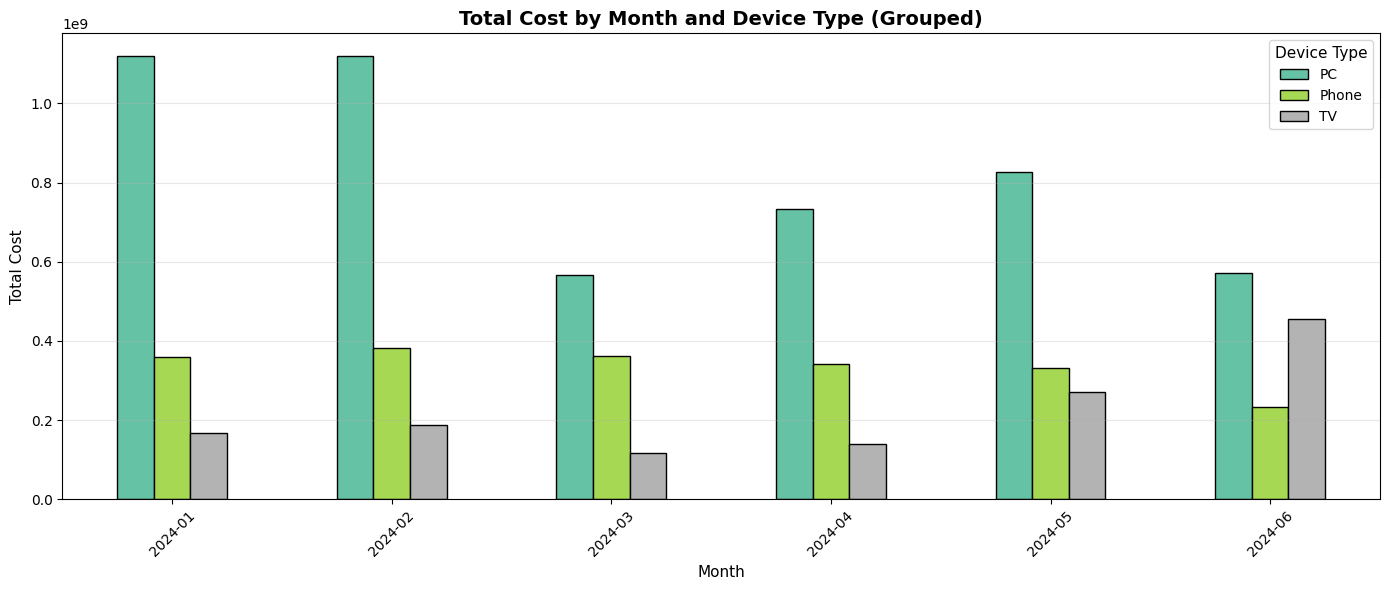

In [14]:
# Total cost by month and device_type
print("=" * 80)
print("TOTAL COST BY MONTH AND DEVICE TYPE")
print("=" * 80)

monthly_device_cost = df_programmatic.groupby(['month', 'device_type'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_device_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_device_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Stacked)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_device_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The programmatic data shows that **Contextual campaigns account for most of the total spend**, while **Retargeting campaigns represent a smaller share but with higher average costs**. Spending is mainly driven by **PC devices**, followed by **mobile**, whereas **TV generates fewer events but higher average costs**. Over time, monthly spending varies, but the **overall allocation by campaign type and device remains stable** across the period.
